In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases 

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [2]:
bank_df = pd.read_csv("marketing_data.csv")
bank_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
# check data types
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
bank_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

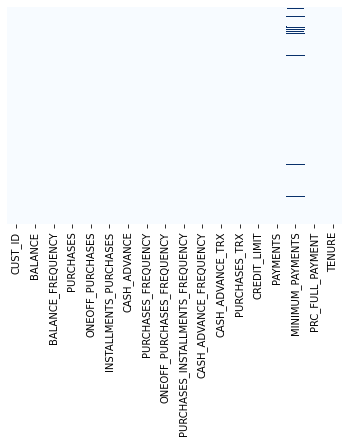

In [5]:
# Check for missing data
sns.heatmap(bank_df.isnull(), yticklabels=False,cbar=False,cmap="Blues")

In [6]:
# find where the null values are:
bank_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# replace null values with the mean
# minimum payments column
bank_df.loc[bank_df['MINIMUM_PAYMENTS'].isnull() == True,\
            "MINIMUM_PAYMENTS"] = bank_df['MINIMUM_PAYMENTS'].mean()

# credit limit column
bank_df.loc[bank_df['CREDIT_LIMIT'].isnull() == True, \
            'CREDIT_LIMIT'] = bank_df['CREDIT_LIMIT'].mean()

In [8]:
# check if we still have null values
bank_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# drop cust_id
bank_df.drop(columns=['CUST_ID'],axis=1,inplace=True)

In [10]:
# check if changes are made
bank_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [11]:
# generate a correlation matrix to describe relationship between variables
correlation_mtx = bank_df.corr()

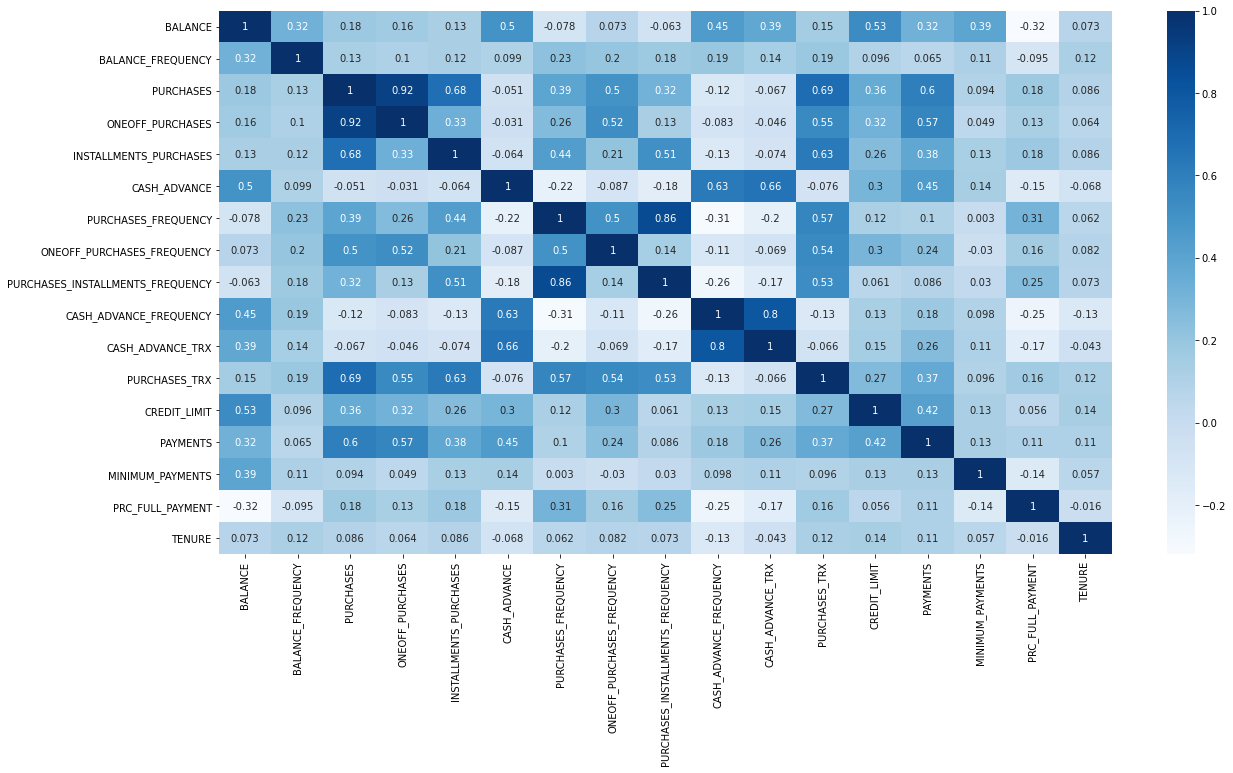

In [12]:
# create a heatmap to display relationships
plt.figure(figsize = (20,10))
# f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation_mtx, annot=True,cmap="Blues")


In [13]:
# normalize the data
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
bank_df_scaled = scaler.fit_transform(bank_df)

In [15]:
bank_df_scaled[:4]

array([[-7.31989366e-01, -2.49434481e-01, -4.24899735e-01,
        -3.56934022e-01, -3.49078819e-01, -4.66785554e-01,
        -8.06490346e-01, -6.78660808e-01, -7.07313165e-01,
        -6.75348858e-01, -4.76069817e-01, -5.11333250e-01,
        -9.60433344e-01, -5.28978791e-01, -3.10967549e-01,
        -5.25550971e-01,  3.60679544e-01],
       [ 7.86960853e-01,  1.34324671e-01, -4.69551882e-01,
        -3.56934022e-01, -4.54576230e-01,  2.60560451e+00,
        -1.22175806e+00, -6.78660808e-01, -9.16995191e-01,
         5.73962722e-01,  1.10073852e-01, -5.91795877e-01,
         6.88639034e-01,  8.18642127e-01,  8.93102090e-02,
         2.34226897e-01,  3.60679544e-01],
       [ 4.47135132e-01,  5.18083823e-01, -1.07668230e-01,
         1.08888513e-01, -4.54576230e-01, -4.66785554e-01,
         1.26984323e+00,  2.67345108e+00, -9.16995191e-01,
        -6.75348858e-01, -4.76069817e-01, -1.09020117e-01,
         8.26061732e-01, -3.83804738e-01, -1.01663181e-01,
        -5.25550971e-01,  3.6

In [16]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [17]:
# find the best k value to use. test 19 numbers using the elbow method

kmeans_list = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i).fit(bank_df_scaled)
    kmeans_list.append(kmeans.inertia_)


([<matplotlib.axis.XTick at 0x218f17d2048>,
 <a list of 20 Text major ticklabel objects>)

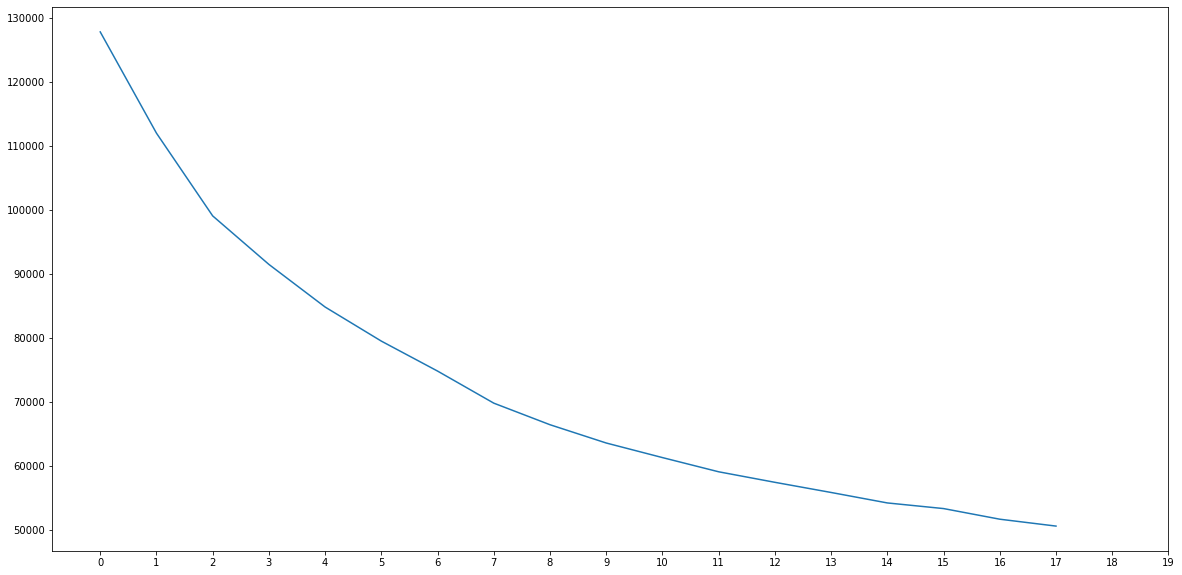

In [18]:
plt.figure(figsize = (20,10))
plt.plot(kmeans_list)
plt.xticks(ticks=(np.arange(20)))


the third cluster seems to form the elbow of the curve but it doesn't reduce linearly until the 8th cluster so I choose k=8

In [19]:
# apply the k-means method
kmeans = KMeans(8)
kmeans.fit(bank_df_scaled)
# labels (clusters) associated to each data point
labels = kmeans.labels_

In [20]:
# centroids for all clusters
cluster_centers = kmeans.cluster_centers_

In [21]:
bank_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [22]:
centroids = pd.DataFrame(data = cluster_centers, columns = [bank_df.columns])
centroids.head()

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.701222         -2.139409  -0.310833        -0.235565   
1 -0.165621          0.393101   0.473233         0.616950   
2 -0.366314          0.333522  -0.039581        -0.244780   
3  1.706890          0.392242  -0.214522        -0.153942   
4  1.923051          0.337717  11.212042        10.600367   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.302072    -0.322522           -0.555428   
1              -0.014643    -0.333808            0.946448   
2               0.355929    -0.364780            0.988573   
3              -0.224484     2.050093           -0.472407   
4               7.033118     0.419625            1.046983   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.443021                        -0.439828   
1                   1.881880                         0.092228   
2                  -0.387904                         1.204013   
3                  -0.209823                        -0.409080   
4                   1.915501                         0.981334   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.521634        -0.376396     -0.419502    -0.177998   
1              -0.408068        -0.324367      0.532971     0.381060   
2              -0.475965        -0.361895      0.185597    -0.261737   
3               1.941162         1.966831     -0.262375     1.040069   
4              -0.258912         0.061229      5.362438     3.044064   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.202299        -0.257071         0.280448  0.202001  
1  0.100656        -0.162835         0.416329  0.262714  
2 -0.219139        -0.046168         0.312466  0.257586  
3  0.839280         0.522124        -0.390471  0.067089  
4  8.098975         1.120318         1.110132  0.310863

In [23]:
bank_df['BALANCE'].max()

19043.13856

In [24]:
# inverse transformation to gain a better understanding of the numbers
# this outs an array
centroids = scaler.inverse_transform(centroids)
# put the array back into a dataframe

centroids = pd.DataFrame(data = centroids, columns = [bank_df.columns])
centroids

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   104.939796          0.370465    339.104814       201.448528   
1  1219.748420          0.970393   2014.274792      1616.448752   
2   802.023378          0.956279    918.639543       186.152834   
3  5117.222857          0.970189    544.875018       336.925917   
4  5567.142164          0.957273  24957.905000     18186.875667   
5  1618.536741          0.973063    230.712989       182.982225   
6  3510.393168          0.987910   5816.674519      3426.390962   
7   863.627544          0.793976    384.563451       233.602408   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             137.907386   302.527006            0.267430   
1             397.826040   278.861158            0.870206   
2             732.930025   213.911367            0.887113   
3             208.069420  5278.012480            0.300751   
4            6771.029333  1858.844605            0.910556   
5              47.911840   808.716987            0.142340   
6            2391.725865   574.762188            0.956216   
7             151.442584  1121.745122            0.408189   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.070296                         0.189639   
1                   0.763859                         0.401091   
2                   0.086738                         0.842943   
3                   0.139863                         0.201859   
4                   0.773889                         0.754444   
5                   0.080202                         0.062784   
6                   0.664285                         0.864089   
7                   0.116158                         0.274754   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.030760         0.680203      4.282572   3846.818481   
1               0.053486         1.035262     27.957505   5880.901693   
2               0.039899         0.779156     19.323077   3542.144021   
3               0.523590        16.671006      8.188166   8278.644432   
4               0.083333         3.666667    148.000000  15570.000000   
5               0.159417         3.137944      2.615441   3409.684108   
6               0.073095         1.824519     84.322115   8989.062500   
7               0.196795         3.252006      5.054575   2433.410031   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1147.508187       265.114438         0.235741  11.787648  
1   2024.533974       484.726340         0.275484  11.868897  
2   1098.758035       756.613473         0.245106  11.862035  
3   4162.777684      2080.994542         0.039508  11.607101  
4  25178.882690      3475.059479         0.478409  11.933333  
5   1021.979496       857.990668         0.020282  11.880717  
6   5445.158665      2206.210364         0.233656  11.963942  
7    595.475430       377.585275         0.157559   7.231140

In [25]:
print(labels.shape)
print(labels.max())
print(labels.min())
print(bank_df.shape)

(8950,)
7
0
(8950, 17)


In [26]:
# create a datafre for labels before concatenating to the bank_df dataframe
labels_df = pd.DataFrame({"cluster": labels})
labels_df

cluster
0           5
1           3
2           1
3           5
4           5
...       ...
8945        7
8946        7
8947        7
8948        7
8949        7

[8950 rows x 1 columns]

In [27]:
# concatenate cluster labels to the centroid dataframe
bank_cluster = pd.concat([bank_df, labels_df],axis=1)
bank_cluster

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        5  
1     4103.032597       1072.340217          0.222222      12        3  
2      622.066742        627.284787          0.000000      12        1  
3        0.000000        864.206542          0.000000      12        5  
4      678.334763        244.791237          0.000000      12        5  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        7  
89

In [28]:
y_kmeans = kmeans.fit_predict(bank_df_scaled)
y_kmeans

array([4, 2, 3, ..., 6, 6, 6])

In [29]:
bank_cluster_group = bank_cluster.groupby(['cluster'])
bank_cluster_group.mean()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                   
0         104.939796           0.370465    339.104814        201.448528   
1        1219.748420           0.970393   2014.274792       1616.448752   
2         802.023378           0.956279    918.639543        186.152834   
3        5117.986411           0.970260    544.526541        336.772834   
4        5567.142164           0.957273  24957.905000      18186.875667   
5        1615.737729           0.973044    230.590996        182.916964   
6        3510.393168           0.987910   5816.674519       3426.390962   
7         863.627544           0.793976    384.563451        233.602408   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    137.907386    302.527006             0.267430   
1                    397.826040    278.861158             0.870206   
2                    732.930025    213.911367             0.887113   
3                    207.873743   5268.064382             0.301516   
4                   6771.029333   1858.844605             0.910556   
5                     47.855240    808.529308             0.141987   
6                   2391.725865    574.762188             0.956216   
7                    151.442584   1121.745122             0.408189   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.070296                          0.189639   
1                          0.763859                          0.401091   
2                          0.086738                          0.842943   
3                          0.139927                          0.202267   
4                          0.773889                          0.754444   
5                          0.080138                          0.062555   
6                          0.664285                          0.864089   
7                          0.116158                          0.274754   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                      0.030760          0.680203       4.282572   
1                      0.053486          1.035262      27.957505   
2                      0.039899          0.779156      19.323077   
3                      0.523043         16.644628       8.186541   
4                      0.083333          3.666667     148.000000   
5                      0.159320          3.136214       2.611864   
6                      0.073095          1.824519      84.322115   
7                      0.196795          3.252006       5.054575   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                   
0         3846.818481   1147.508187        265.114438          0.235741   
1         5880.901693   2024.533974        484.726340          0.275484   
2         3542.144021   1098.758035        756.613473          0.245106   
3         8284.479983   4157.075557       2079.208200          0.039415   
4        15570.000000  25178.882690       3475.059479          0.478409   
5         3404.308556   1021.447861        857.649044          0.020297   
6         8989.062500   5445.158665       2206.210364          0.233656   
7         2433.410031    595.475430        377.585275          0.157559   

            TENURE  
cluster             
0        11.787648  
1        11.868897  
2        11.862035  
3        11.608028  
4        11.933333  
5        11.880630  
6        11.963942  
7         7.231140

In [37]:
bank_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

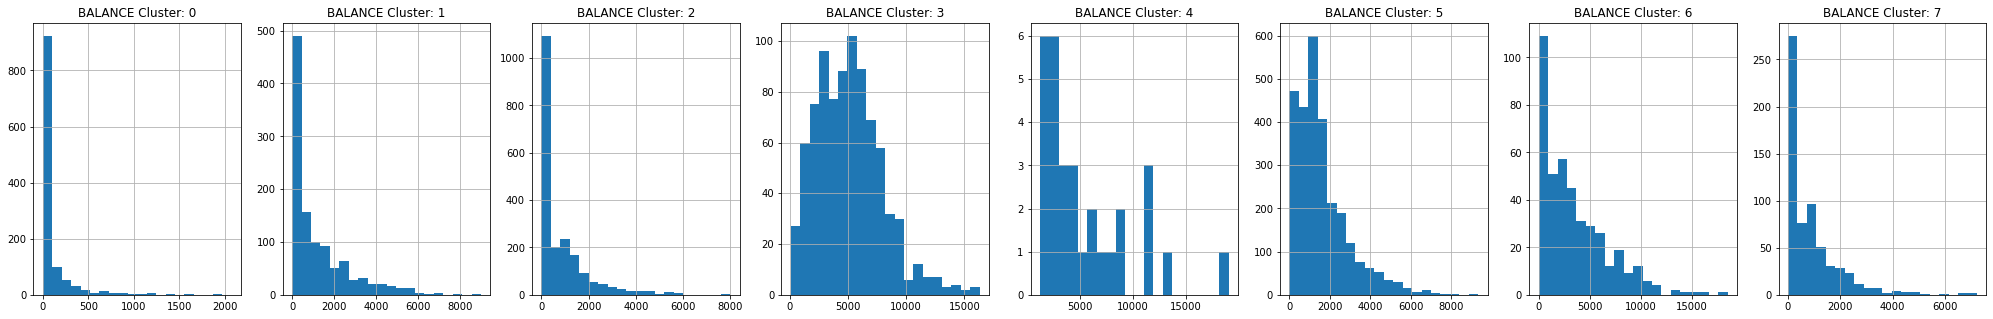

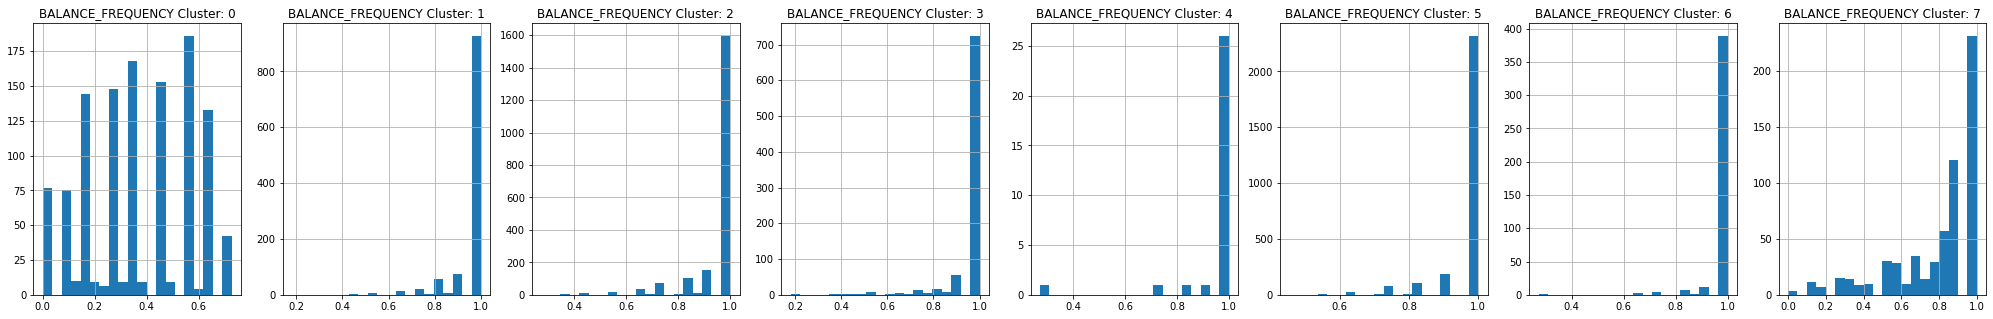

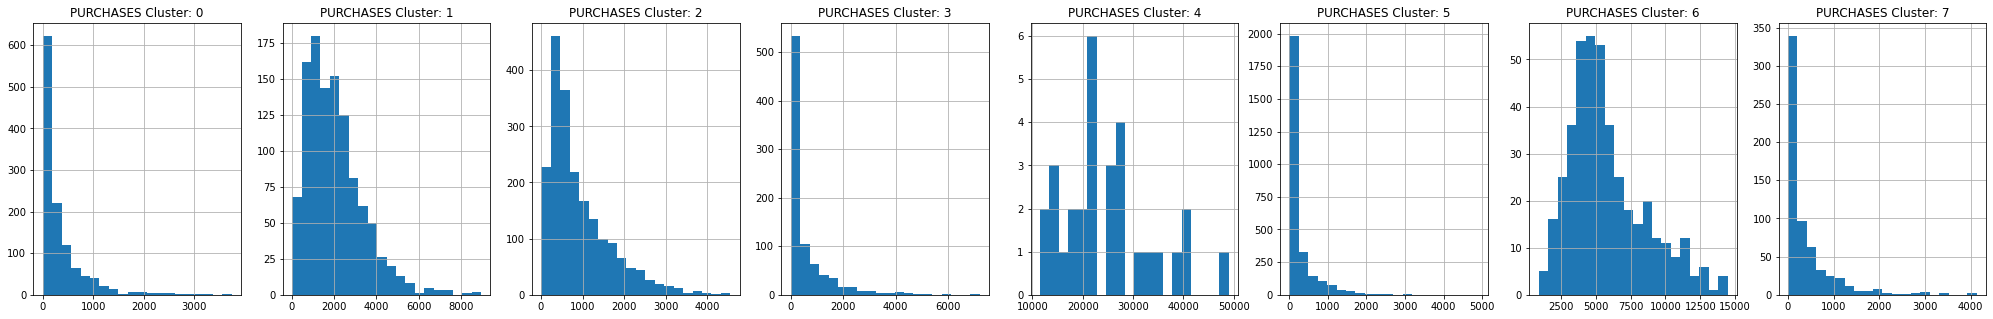

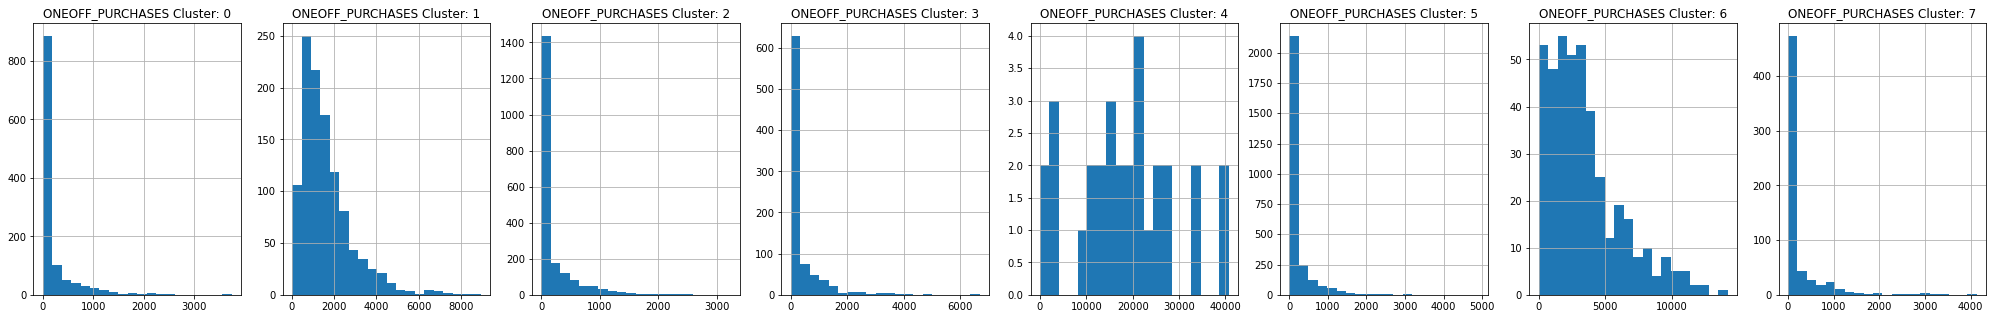

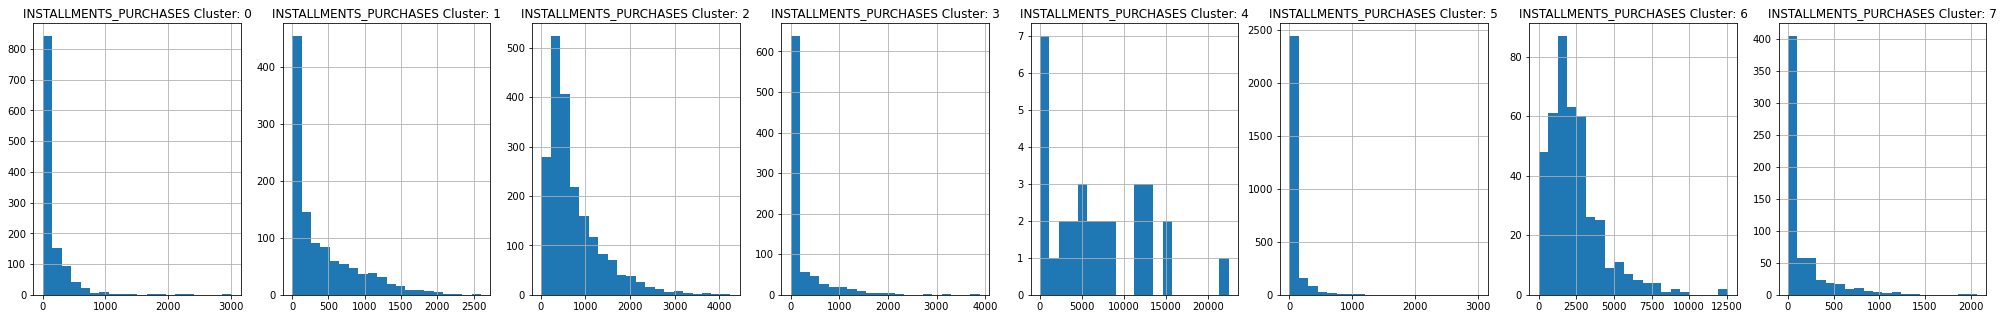

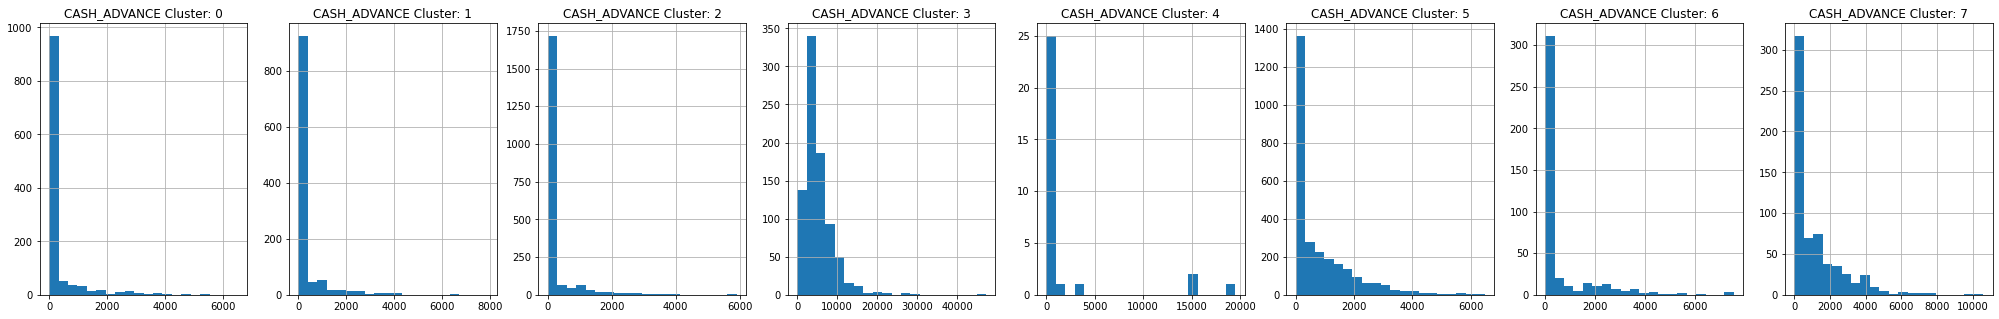

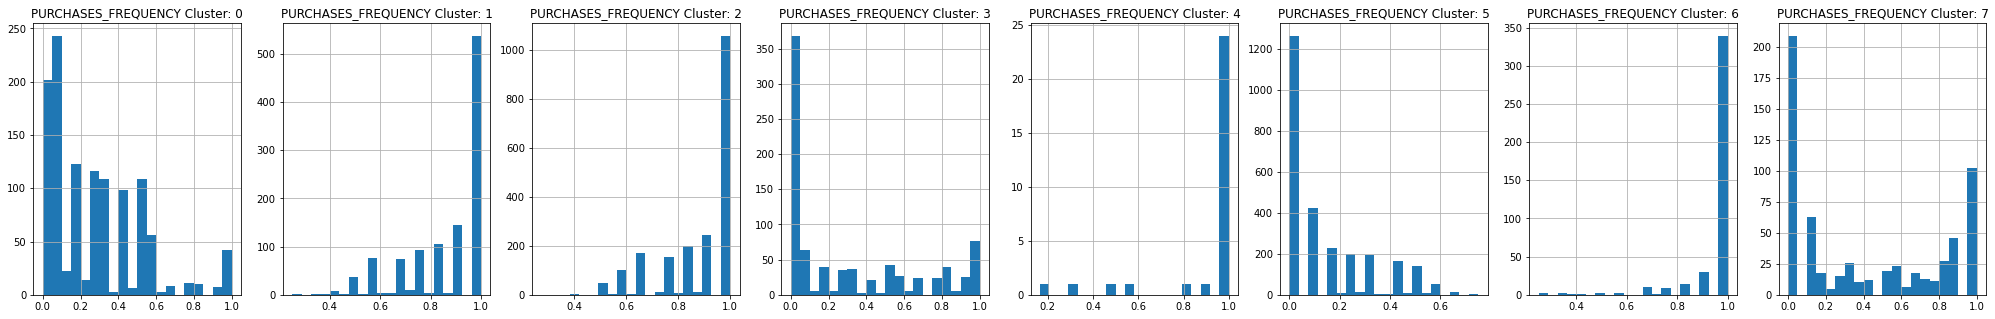

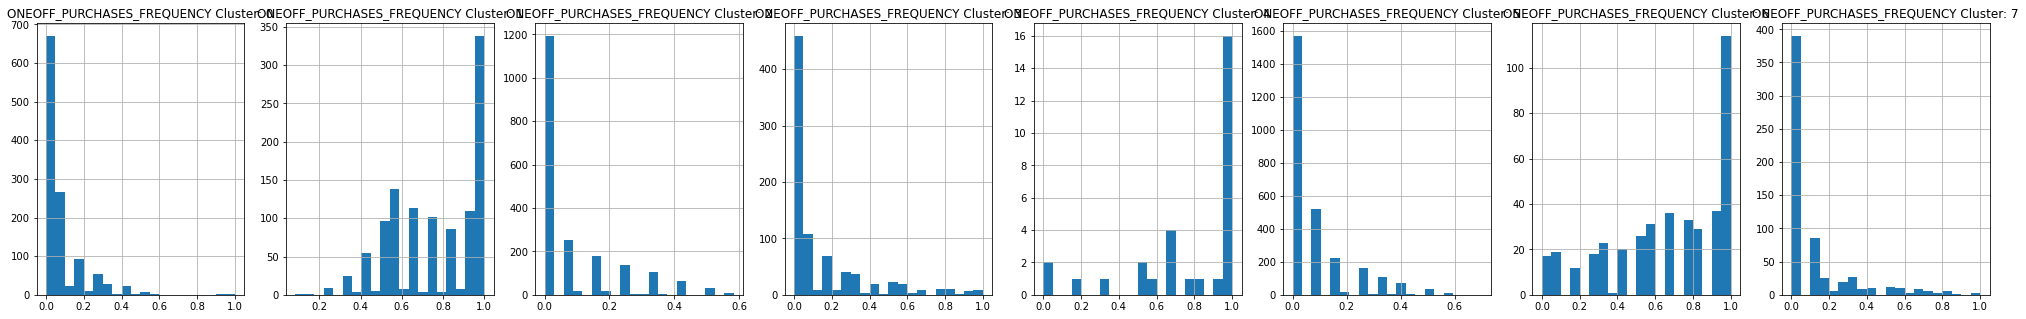

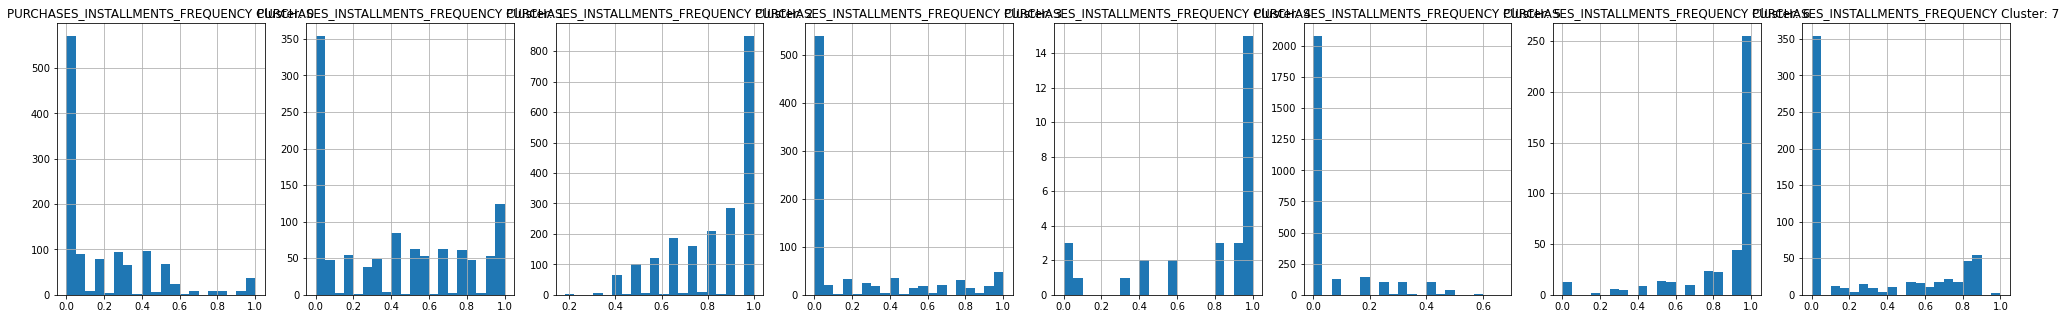

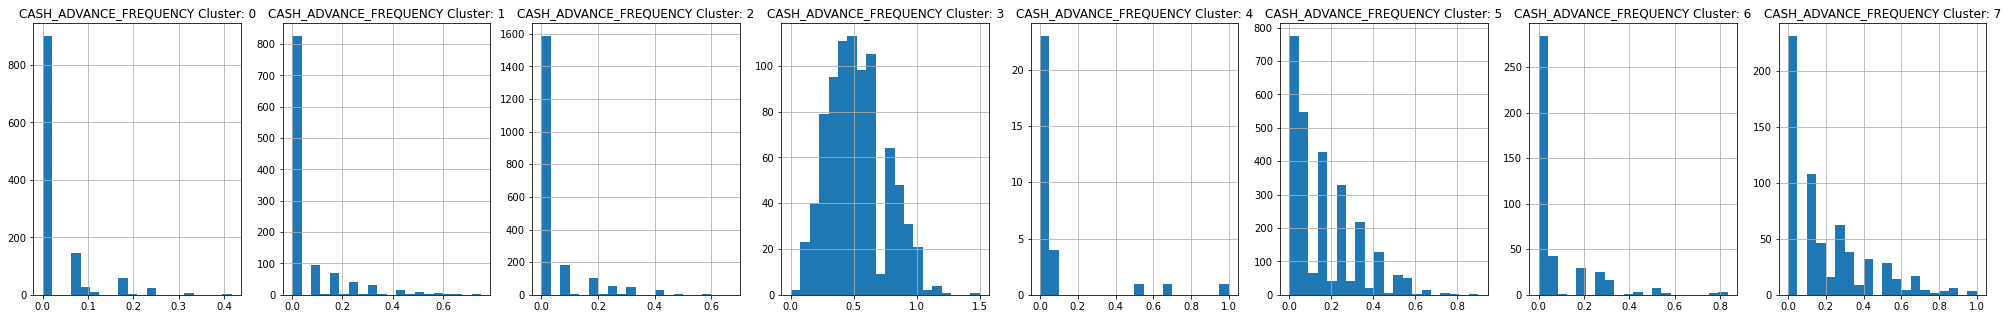

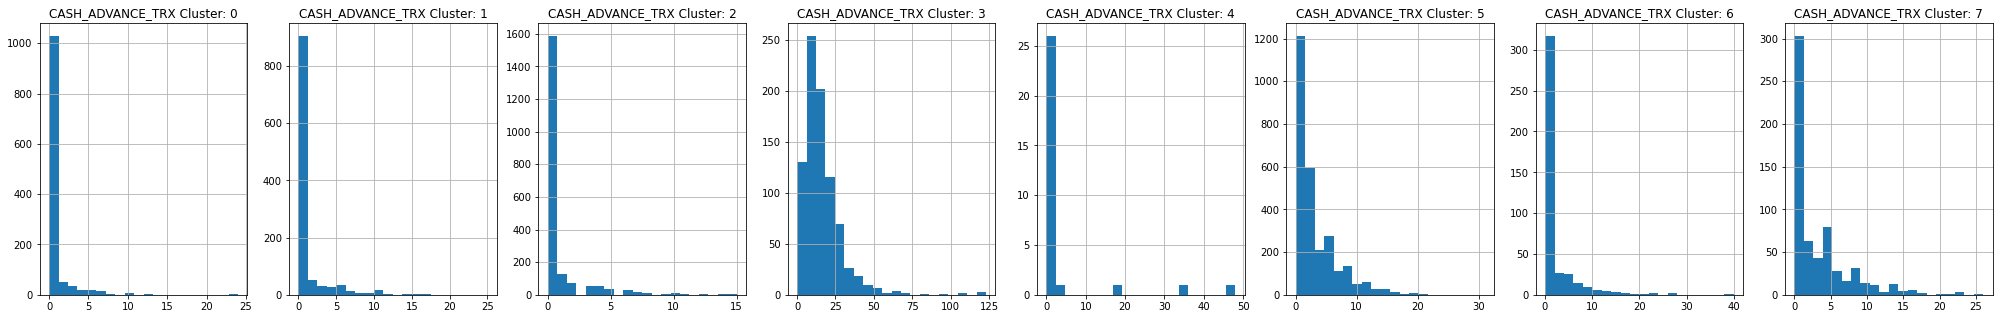

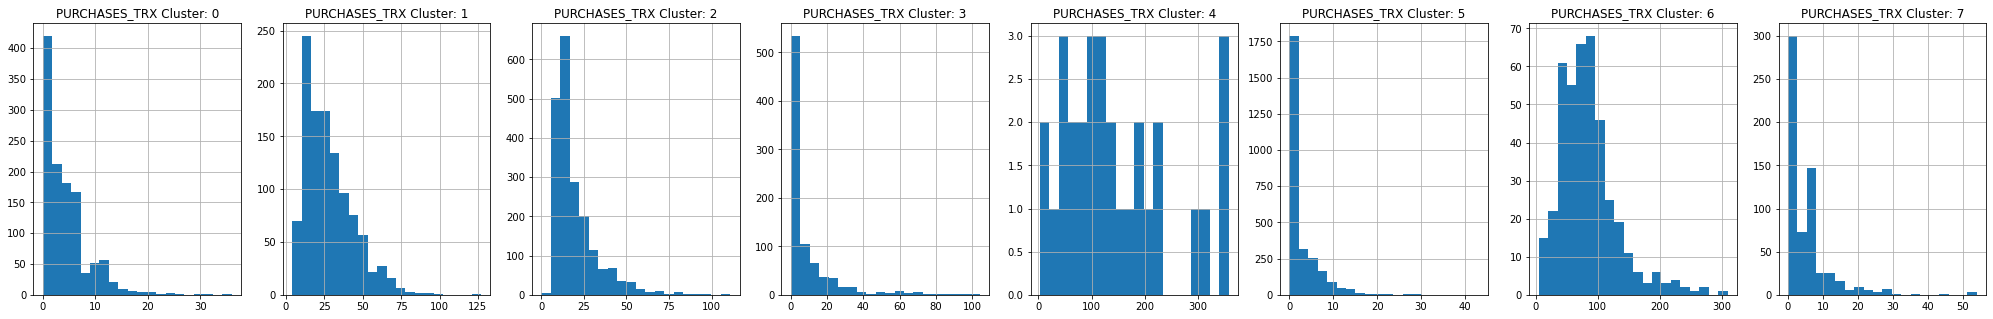

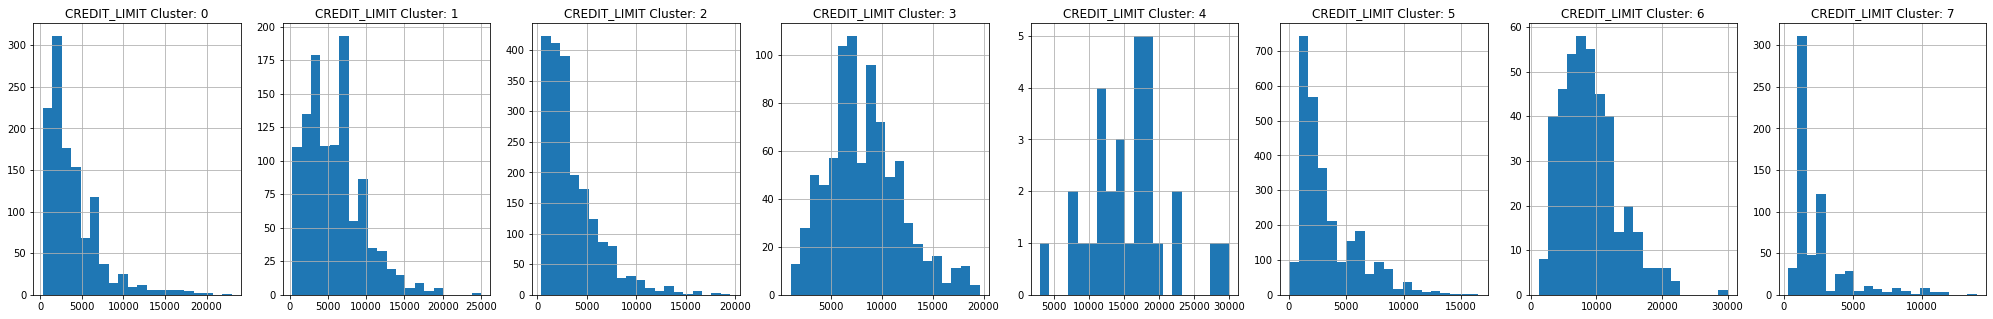

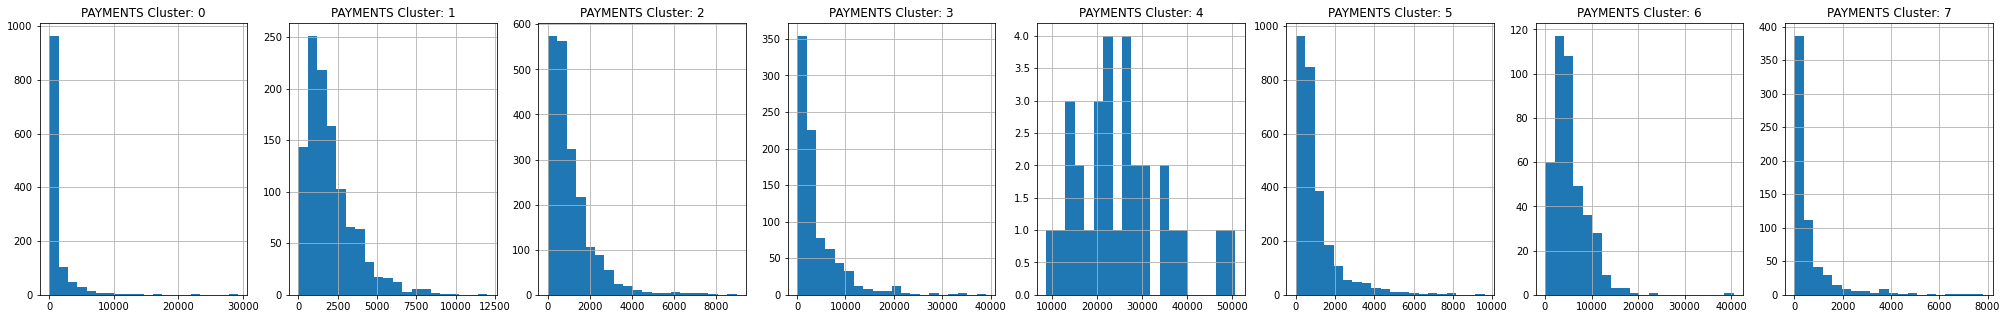

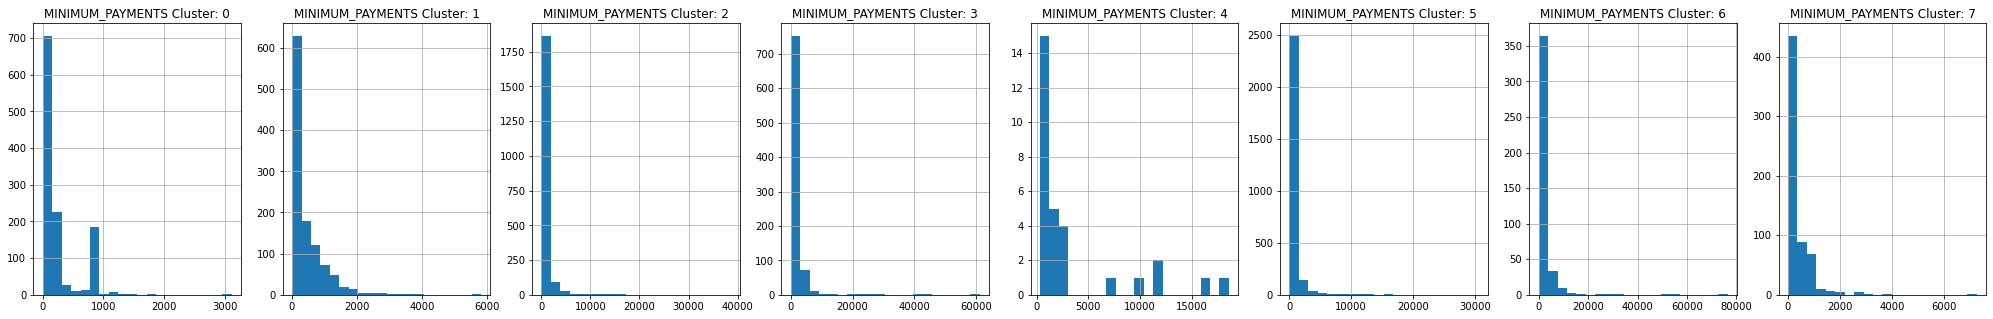

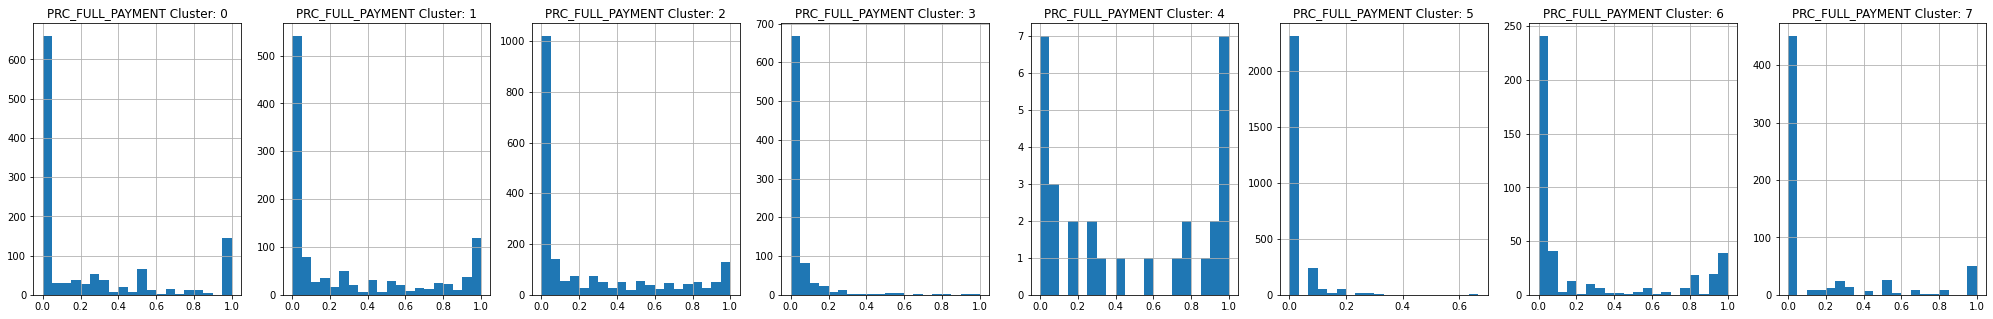

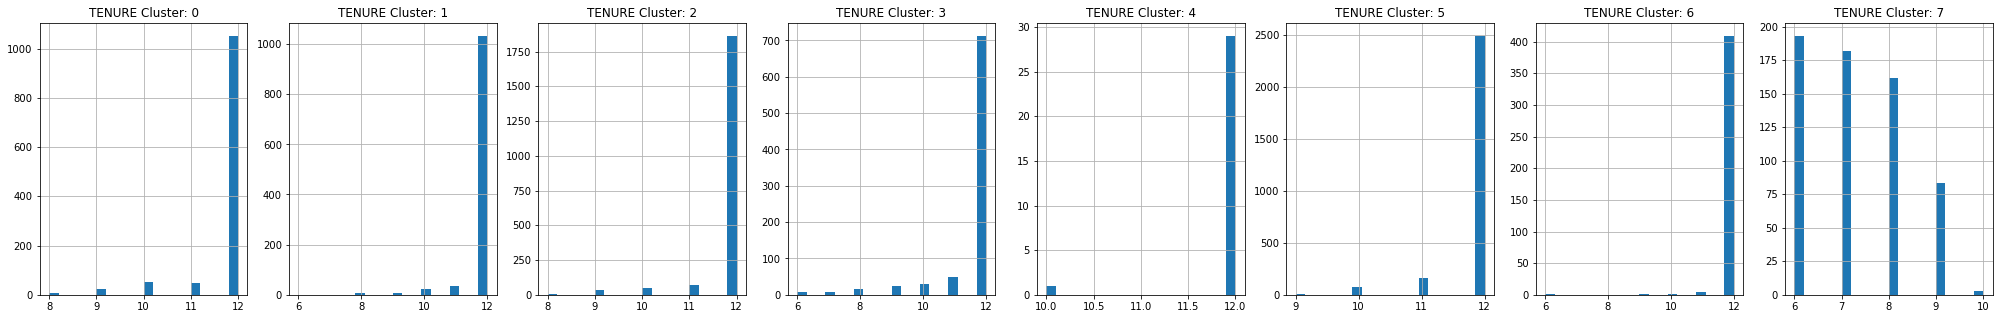

In [30]:
# visualize the behaviors of customers from each cluster
for makingbank in bank_df.columns:
    plt.figure(figsize= (35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster =  bank_cluster[bank_cluster['cluster'] == j]
        cluster[makingbank].hist(bins=20)
        plt.title(f"{makingbank} Cluster: {j}")

In [31]:
# Principal Components analysis
# converting the 17 features dataframe into 2 components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(bank_df_scaled)

In [32]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682220 -1.076453
1 -1.138296  2.506477
2  0.969685 -0.383522
3 -0.873627  0.043164
4 -1.599433 -0.688583

In [33]:
# concatenate cluster labels to the pca dataframe
pca_df = pd.concat([pca_df,labels_df],axis=1)
pca_df.head()

pca1      pca2  cluster
0 -1.682220 -1.076453        5
1 -1.138296  2.506477        3
2  0.969685 -0.383522        1
3 -0.873627  0.043164        5
4 -1.599433 -0.688583        5

In [42]:
labels_df['cluster'].unique()

array([5, 3, 1, 2, 6, 0, 7, 4])

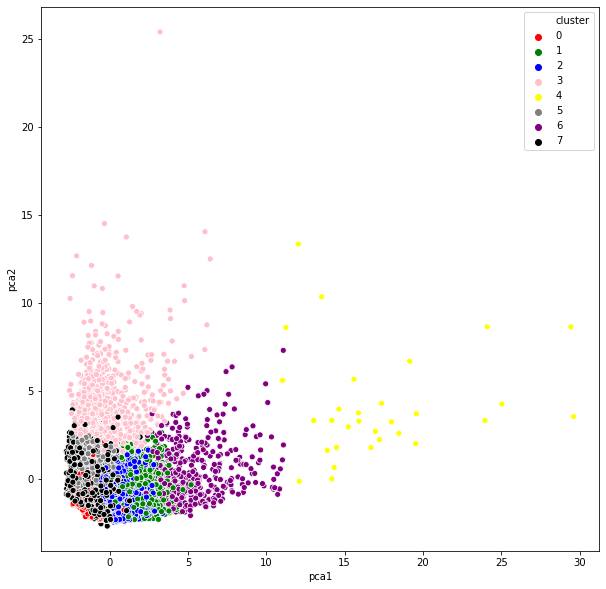

In [35]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette =['red','green','blue','pink','yellow','gray','purple', 'black'])

In [58]:
bank_cluster_group.mean()
bank_cluster_mean = bank_cluster_group.mean()

In [56]:
mean_list = []
for b in bank_cluster_group.mean().mean(axis=0):
    mean_list.append(b)

In [61]:
bank_cluster_mean

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                   
0         104.939796           0.370465    339.104814        201.448528   
1        1219.748420           0.970393   2014.274792       1616.448752   
2         802.023378           0.956279    918.639543        186.152834   
3        5117.986411           0.970260    544.526541        336.772834   
4        5567.142164           0.957273  24957.905000      18186.875667   
5        1615.737729           0.973044    230.590996        182.916964   
6        3510.393168           0.987910   5816.674519       3426.390962   
7         863.627544           0.793976    384.563451        233.602408   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    137.907386    302.527006             0.267430   
1                    397.826040    278.861158             0.870206   
2                    732.930025    213.911367             0.887113   
3                    207.873743   5268.064382             0.301516   
4                   6771.029333   1858.844605             0.910556   
5                     47.855240    808.529308             0.141987   
6                   2391.725865    574.762188             0.956216   
7                    151.442584   1121.745122             0.408189   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.070296                          0.189639   
1                          0.763859                          0.401091   
2                          0.086738                          0.842943   
3                          0.139927                          0.202267   
4                          0.773889                          0.754444   
5                          0.080138                          0.062555   
6                          0.664285                          0.864089   
7                          0.116158                          0.274754   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                      0.030760          0.680203       4.282572   
1                      0.053486          1.035262      27.957505   
2                      0.039899          0.779156      19.323077   
3                      0.523043         16.644628       8.186541   
4                      0.083333          3.666667     148.000000   
5                      0.159320          3.136214       2.611864   
6                      0.073095          1.824519      84.322115   
7                      0.196795          3.252006       5.054575   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                   
0         3846.818481   1147.508187        265.114438          0.235741   
1         5880.901693   2024.533974        484.726340          0.275484   
2         3542.144021   1098.758035        756.613473          0.245106   
3         8284.479983   4157.075557       2079.208200          0.039415   
4        15570.000000  25178.882690       3475.059479          0.478409   
5         3404.308556   1021.447861        857.649044          0.020297   
6         8989.062500   5445.158665       2206.210364          0.233656   
7         2433.410031    595.475430        377.585275          0.157559   

            TENURE  
cluster             
0        11.787648  
1        11.868897  
2        11.862035  
3        11.608028  
4        11.933333  
5        11.880630  
6        11.963942  
7         7.231140

In [104]:
list(bank_cluster_mean.columns.values).index("BALANCE")

0

In [107]:
# append mean values of each columns into a dictionary to append into the dataframe
empty_dict={}

for i in bank_cluster_mean.columns:
    empty_dict[i] = mean_list[list(bank_cluster_mean.columns.values).index(i)]
empty_dict

{'BALANCE': 2350.1998261395956,
 'BALANCE_FREQUENCY': 0.8724497607748498,
 'PURCHASES': 4400.784957040097,
 'ONEOFF_PURCHASES': 3046.32611848098,
 'INSTALLMENTS_PURCHASES': 1354.8237769789016,
 'CASH_ADVANCE': 1303.4056420285788,
 'PURCHASES_FREQUENCY': 0.592901606922806,
 'ONEOFF_PURCHASES_FREQUENCY': 0.33691118424440775,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.4489728539517492,
 'CASH_ADVANCE_FREQUENCY': 0.14496636946559374,
 'CASH_ADVANCE_TRX': 3.8773319797020043,
 'PURCHASES_TRX': 37.4672809871875,
 'CREDIT_LIMIT': 6493.890658143327,
 'PAYMENTS': 5083.60504970696,
 'MINIMUM_PAYMENTS': 1312.770826802939,
 'PRC_FULL_PAYMENT': 0.2107082665461626,
 'TENURE': 11.266956643573394}

In [109]:
bank_cluster_mean.loc['Mean'] = mean_list

In [110]:
bank_cluster_mean

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                   
0         104.939796           0.370465    339.104814        201.448528   
1        1219.748420           0.970393   2014.274792       1616.448752   
2         802.023378           0.956279    918.639543        186.152834   
3        5117.986411           0.970260    544.526541        336.772834   
4        5567.142164           0.957273  24957.905000      18186.875667   
5        1615.737729           0.973044    230.590996        182.916964   
6        3510.393168           0.987910   5816.674519       3426.390962   
7         863.627544           0.793976    384.563451        233.602408   
Mean     2350.199826           0.872450   4400.784957       3046.326118   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    137.907386    302.527006             0.267430   
1                    397.826040    278.861158             0.870206   
2                    732.930025    213.911367             0.887113   
3                    207.873743   5268.064382             0.301516   
4                   6771.029333   1858.844605             0.910556   
5                     47.855240    808.529308             0.141987   
6                   2391.725865    574.762188             0.956216   
7                    151.442584   1121.745122             0.408189   
Mean                1354.823777   1303.405642             0.592902   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.070296                          0.189639   
1                          0.763859                          0.401091   
2                          0.086738                          0.842943   
3                          0.139927                          0.202267   
4                          0.773889                          0.754444   
5                          0.080138                          0.062555   
6                          0.664285                          0.864089   
7                          0.116158                          0.274754   
Mean                       0.336911                          0.448973   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                      0.030760          0.680203       4.282572   
1                      0.053486          1.035262      27.957505   
2                      0.039899          0.779156      19.323077   
3                      0.523043         16.644628       8.186541   
4                      0.083333          3.666667     148.000000   
5                      0.159320          3.136214       2.611864   
6                      0.073095          1.824519      84.322115   
7                      0.196795          3.252006       5.054575   
Mean                   0.144966          3.877332      37.467281   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                   
0         3846.818481   1147.508187        265.114438          0.235741   
1         5880.901693   2024.533974        484.726340          0.275484   
2         3542.144021   1098.758035        756.613473          0.245106   
3         8284.479983   4157.075557       2079.208200          0.039415   
4        15570.000000  25178.882690       3475.059479          0.478409   
5         3404.308556   1021.447861        857.649044          0.020297   
6         8989.062500   5445.158665       2206.210364          0.233656   
7         2433.410031    595.475430        377.585275          0.157559   
Mean      6493.890658   5083.605050       1312.770827          0.210708   

            TENURE  
cluster         

In [120]:
# find clusters that have credit limits that's higher than average
bank_cluster_mean.loc[bank_cluster_mean['CREDIT_LIMIT'] > 6493, :]

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                   
3        5117.986411           0.970260    544.526541        336.772834   
4        5567.142164           0.957273  24957.905000      18186.875667   
6        3510.393168           0.987910   5816.674519       3426.390962   
Mean     2350.199826           0.872450   4400.784957       3046.326118   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
3                    207.873743   5268.064382             0.301516   
4                   6771.029333   1858.844605             0.910556   
6                   2391.725865    574.762188             0.956216   
Mean                1354.823777   1303.405642             0.592902   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
3                          0.139927                          0.202267   
4                          0.773889                          0.754444   
6                          0.664285                          0.864089   
Mean                       0.336911                          0.448973   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
3                      0.523043         16.644628       8.186541   
4                      0.083333          3.666667     148.000000   
6                      0.073095          1.824519      84.322115   
Mean                   0.144966          3.877332      37.467281   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                   
3         8284.479983   4157.075557       2079.208200          0.039415   
4        15570.000000  25178.882690       3475.059479          0.478409   
6         8989.062500   5445.158665       2206.210364          0.233656   
Mean      6493.890658   5083.605050       1312.770827          0.210708   

            TENURE  
cluster             
3        11.608028  
4        11.933333  
6        11.963942  
Mean     11.266957

In [122]:
bank_cluster_mean.iloc[[0,1,2,6]]

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
0         104.939796           0.370465   339.104814        201.448528   
1        1219.748420           0.970393  2014.274792       1616.448752   
2         802.023378           0.956279   918.639543        186.152834   
6        3510.393168           0.987910  5816.674519       3426.390962   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    137.907386    302.527006             0.267430   
1                    397.826040    278.861158             0.870206   
2                    732.930025    213.911367             0.887113   
6                   2391.725865    574.762188             0.956216   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.070296                          0.189639   
1                          0.763859                          0.401091   
2                          0.086738                          0.842943   
6                          0.664285                          0.864089   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                      0.030760          0.680203       4.282572   
1                      0.053486          1.035262      27.957505   
2                      0.039899          0.779156      19.323077   
6                      0.073095          1.824519      84.322115   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                  
0         3846.818481  1147.508187        265.114438          0.235741   
1         5880.901693  2024.533974        484.726340          0.275484   
2         3542.144021  1098.758035        756.613473          0.245106   
6         8989.062500  5445.158665       2206.210364          0.233656   

            TENURE  
cluster             
0        11.787648  
1        11.868897  
2        11.862035  
6        11.963942

In [123]:
bank_cluster_mean.loc['Mean']

BALANCE                             2350.199826
BALANCE_FREQUENCY                      0.872450
PURCHASES                           4400.784957
ONEOFF_PURCHASES                    3046.326118
INSTALLMENTS_PURCHASES              1354.823777
CASH_ADVANCE                        1303.405642
PURCHASES_FREQUENCY                    0.592902
ONEOFF_PURCHASES_FREQUENCY             0.336911
PURCHASES_INSTALLMENTS_FREQUENCY       0.448973
CASH_ADVANCE_FREQUENCY                 0.144966
CASH_ADVANCE_TRX                       3.877332
PURCHASES_TRX                         37.467281
CREDIT_LIMIT                        6493.890658
PAYMENTS                            5083.605050
MINIMUM_PAYMENTS                    1312.770827
PRC_FULL_PAYMENT                       0.210708
TENURE                                11.266957
Name: Mean, dtype: float64

Transactors: Customers who pay the least amount of interest charges and careful with their money
* cluster 4
* cluster 0: low purchase frequency, low credit limit, around average % full payment

Revolvers: customers who use their CC as a loan. this group is the most lucrative sector for the bank since they pay 20%+ interest.
* cluster 3, 5 both have very low minimum payment percentage



New Customers:
* cluster 7: moderate blanace, moderate balance frequency, low credit limit

VIP/Prime: customers with high credit limit/% full payments, targeted to increase their credit limit/spending
* cluster 4: highest credit limit and purchases among the clusters with the highest % full payments
* cluster 6: high credit limit and higher than average % full payments


Clients tend to stay with the company for long periods of time with the average tenure at 11.27 years


In [41]:
# np.array(30.0).reshape(-1,1)

array([[30.]])